In [118]:
from matplotlib import pyplot as plt    
import pandas as pd

Dataset - https://climatedata.imf.org/pages/access-data

In [119]:
climate = pd.read_csv('Annual_Surface_Temperature_Change.csv')

In [120]:
climate.head(), climate.columns

(   ObjectId                       Country ISO2 ISO3  \
 0         1  Afghanistan, Islamic Rep. of   AF  AFG   
 1         2                       Albania   AL  ALB   
 2         3                       Algeria   DZ  DZA   
 3         4                American Samoa   AS  ASM   
 4         5      Andorra, Principality of   AD  AND   
 
                                            Indicator            Unit  \
 0  Temperature change with respect to a baseline ...  Degree Celsius   
 1  Temperature change with respect to a baseline ...  Degree Celsius   
 2  Temperature change with respect to a baseline ...  Degree Celsius   
 3  Temperature change with respect to a baseline ...  Degree Celsius   
 4  Temperature change with respect to a baseline ...  Degree Celsius   
 
                                               Source CTS_Code  \
 0  Food and Agriculture Organization of the Unite...     ECCS   
 1  Food and Agriculture Organization of the Unite...     ECCS   
 2  Food and Agriculture

array([[<Axes: title={'center': 'F1961'}>,
        <Axes: title={'center': 'F1962'}>,
        <Axes: title={'center': 'F1963'}>,
        <Axes: title={'center': 'F1964'}>,
        <Axes: title={'center': 'F1965'}>,
        <Axes: title={'center': 'F1966'}>,
        <Axes: title={'center': 'F1967'}>,
        <Axes: title={'center': 'F1968'}>],
       [<Axes: title={'center': 'F1969'}>,
        <Axes: title={'center': 'F1970'}>,
        <Axes: title={'center': 'F1971'}>,
        <Axes: title={'center': 'F1972'}>,
        <Axes: title={'center': 'F1973'}>,
        <Axes: title={'center': 'F1974'}>,
        <Axes: title={'center': 'F1975'}>,
        <Axes: title={'center': 'F1976'}>],
       [<Axes: title={'center': 'F1977'}>,
        <Axes: title={'center': 'F1978'}>,
        <Axes: title={'center': 'F1979'}>,
        <Axes: title={'center': 'F1980'}>,
        <Axes: title={'center': 'F1981'}>,
        <Axes: title={'center': 'F1982'}>,
        <Axes: title={'center': 'F1983'}>,
        <

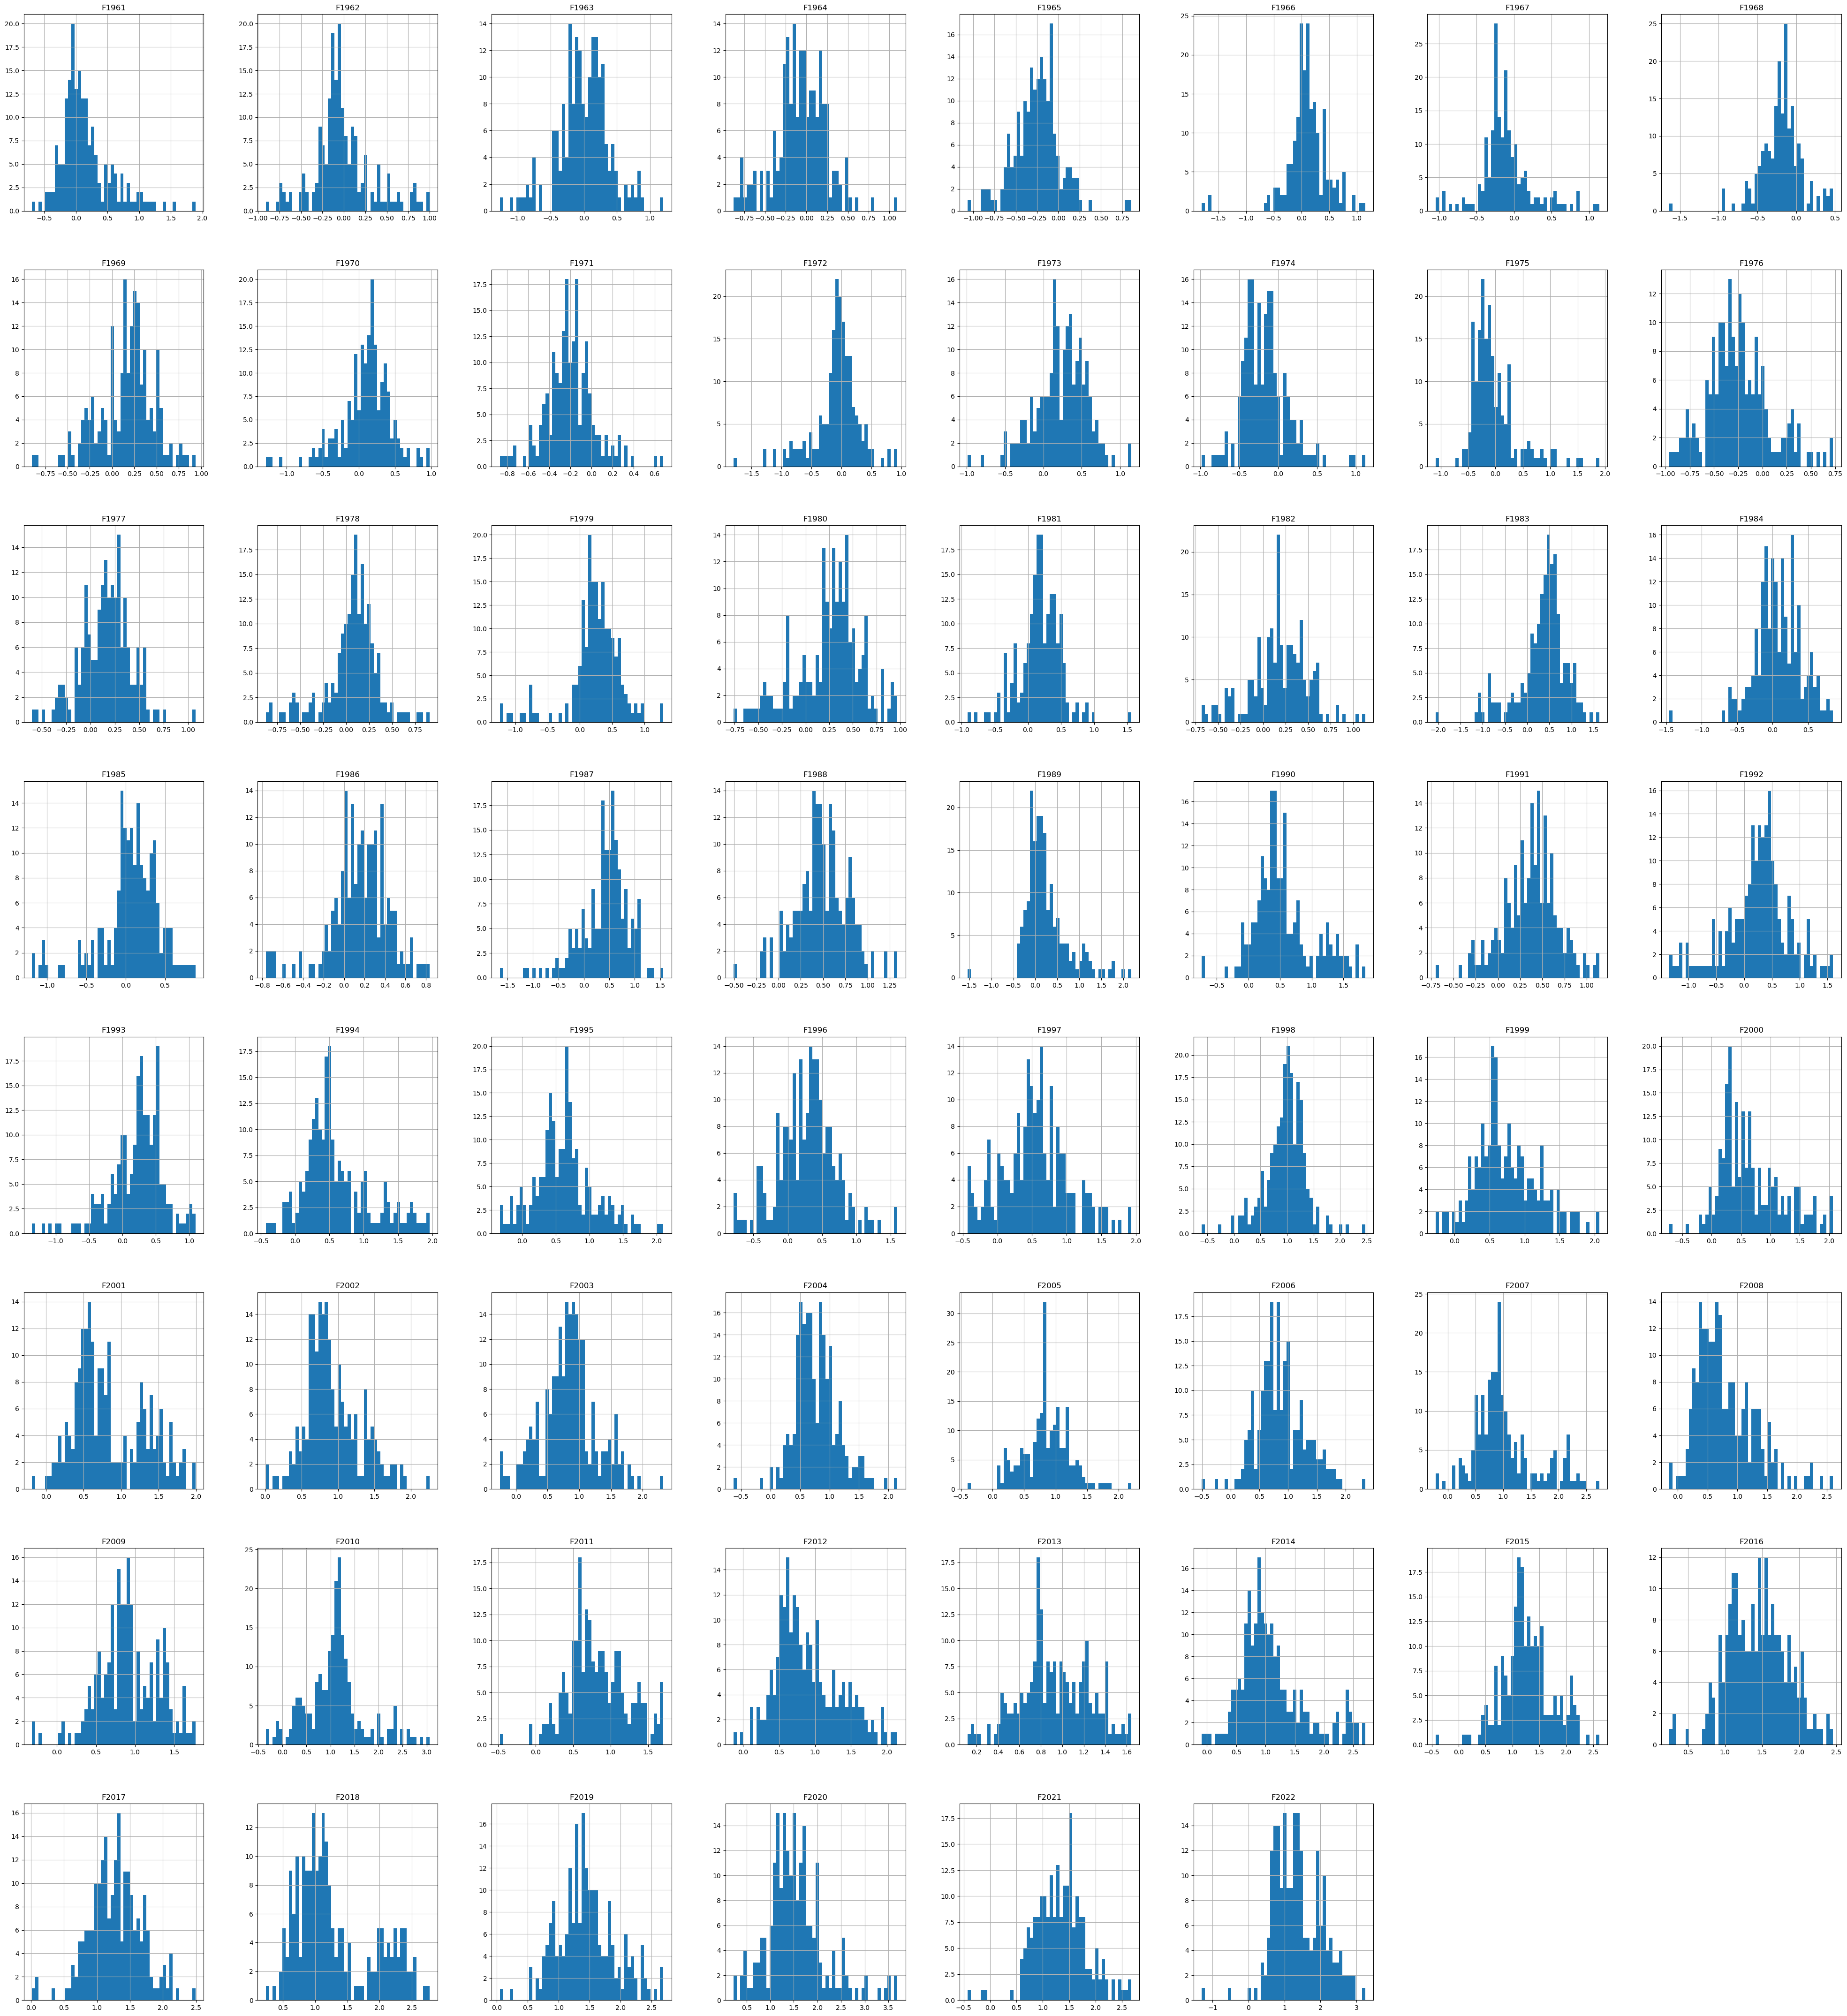

In [121]:
temp_change_data = climate.iloc[:,10:]
temp_change_data['Country'] = climate['Country']

#hist for temp change
temp_change_data.hist(bins=50, figsize=(50,55))


In [122]:
# melt the data 
climate_data = climate.melt(id_vars=['Country','ISO3'],
                            value_vars=[col for col in climate.columns if col in climate.columns if col.startswith('F')],
                            var_name='Year',
                            value_name='TempChange')
climate_data['Year'] = climate_data['Year'].str[1:].astype(int)  # Remove 'F' prefix and convert to int

climate_data.head()

,Country,ISO3,Year,TempChange
0,"Afghanistan, Islamic Rep. of",AFG,1961,-0.113
1,Albania,ALB,1961,0.627
2,Algeria,DZA,1961,0.164
3,American Samoa,ASM,1961,0.079
4,"Andorra, Principality of",AND,1961,0.736


In [123]:
# handling missing data by interpolation for each country
climate_data = climate_data.groupby('Country').apply(lambda x: x.interpolate(method='linear')).reset_index(drop=True)


,Country,ISO3,Year,TempChange
13082,United States,USA,1961,0.003
13083,United States,USA,1962,-0.026
13084,United States,USA,1963,0.418
13085,United States,USA,1964,-0.282
13086,United States,USA,1965,-0.362
...,...,...,...,...
13139,United States,USA,2018,1.276
13140,United States,USA,2019,1.034
13141,United States,USA,2020,1.324
13142,United States,USA,2021,1.144


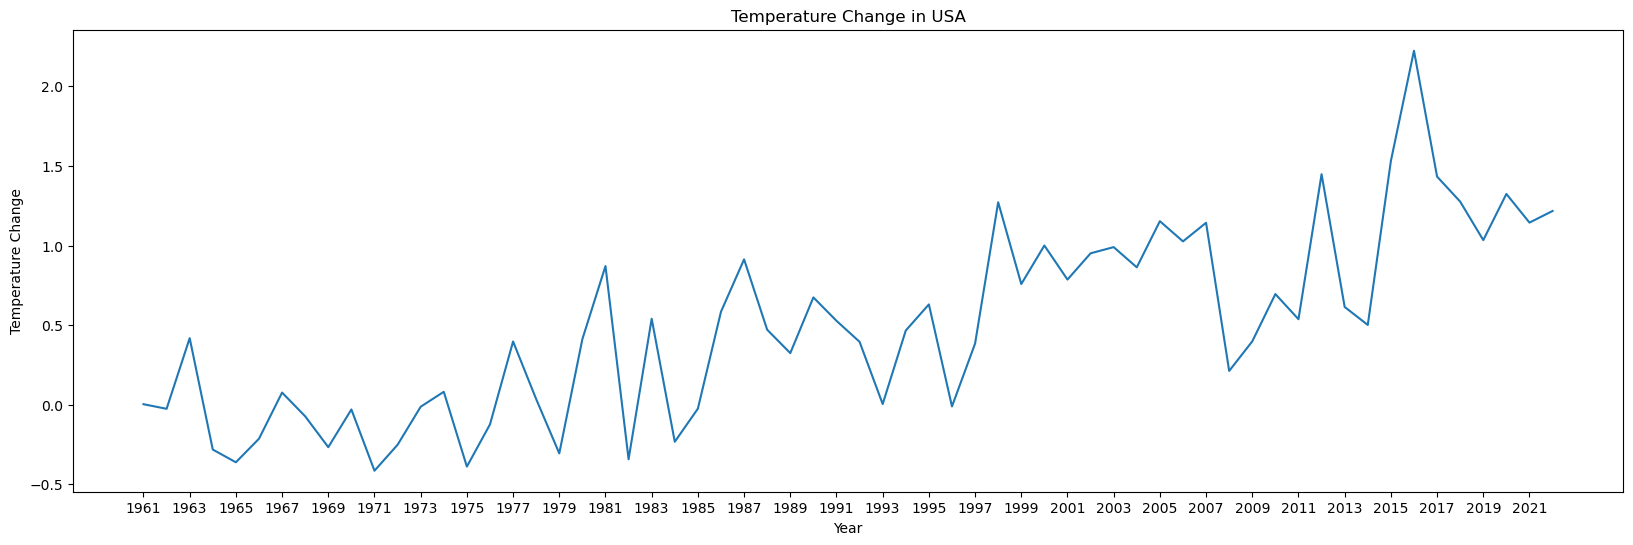

In [124]:
climate_data.head()
USA = climate_data[climate_data['Country'] == 'United States']
display(USA)

plt.figure(figsize=(20, 6))
plt.plot(USA['Year'], USA['TempChange'])
plt.xticks(USA['Year'][::2])
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.title('Temperature Change in USA')
plt.show()


In [125]:
pip install pmdarima 

Note: you may need to restart the kernel to use updated packages.


In [126]:
# To install the library 
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima with adjusted parameters
model = auto_arima(USA['TempChange'], 
                   start_p=0, max_p=3,   # Test AR terms from 0 to 3
                   start_q=0, max_q=3,   # Test MA terms from 0 to 3
                   d=None,               # Automatically determine differencing
                   seasonal=False,        # Enable seasonality
                   m=1,                  # Assuming a 3-year cycle
                   trace=True,           # Show details of the process
                   stepwise=False,       # Perform exhaustive search
                   suppress_warnings=True) # Suppress warnings

print(model.summary())


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=85.658, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80.533, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=70.193, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=68.651, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 2.155 seco

In [127]:
results = model.fit(USA['TempChange'])

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 -29.326
Date:                Fri, 20 Dec 2024   AIC                             68.651
Time:                        21:33:28   BIC                             79.206
Sample:                             0   HQIC                            72.788
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0455      0.065      0.706      0.480      -0.081       0.172
ar.L1         -0.5770      0.174     -3.320      0.001      -0.918      -0.236
ar.L2         -0.5342      0.156     -3.423      0.001      -0.840      -0.228
ar.L3         -0.2376      0.193     -1.229      0.219      -0.616       0.141
sigma2         0.1514      0.027      5.515      0.000       0.098       0.205
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.78   Prob(JB):                         0.56
Heteroskedasticity (H):               2.56   Skew:                             0.27
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Parameter Estimates:
The table below shows the estimated coefficients and their significance for the model parameters.

Intercept:

Estimate: 0.0455
Std Error: 0.065
z-value: 0.706
P-value: 0.480
The intercept is not statistically significant because the p-value is greater than 0.05. This suggests that the intercept term doesn't contribute significantly to the model and might be removed without affecting the fit.


AR(1) (Auto-Regressive term for lag 1):

Estimate: -0.5770
Std Error: 0.174
z-value: -3.320
P-value: 0.001
Interpretation: The AR(1) coefficient is statistically significant with a p-value of 0.001, meaning that the first lag has a strong negative effect on the series. The negative sign indicates that the current value is negatively correlated with the first lag.


AR(2) (Auto-Regressive term for lag 2):

Estimate: -0.5342
Std Error: 0.156
z-value: -3.423
P-value: 0.001
Interpretation: The AR(2) coefficient is also statistically significant with a p-value of 0.001. Like AR(1), it indicates a negative relationship with the second lag, meaning the current value is negatively correlated with the second lag.


AR(3) (Auto-Regressive term for lag 3):

Estimate: -0.2376
Std Error: 0.193
z-value: -1.229
P-value: 0.219
Interpretation: The AR(3) coefficient is not statistically significant with a p-value of 0.219, which suggests that the third lag does not have a meaningful effect on the model and could likely be removed.


Sigma² (Variance of residuals):

Estimate: 0.1514
Std Error: 0.027
Interpretation: This is the variance of the residuals (errors). It indicates the variability of the residuals or how much the model's predictions deviate from the actual data. A lower value would indicate a better fit.
Diagnostic Tests:
Ljung-Box Test:

Q-statistic: 0.08
Prob(Q): 0.78
Interpretation: This test checks whether there is significant autocorrelation remaining in the residuals. The high p-value (0.78) suggests that there is no significant autocorrelation, meaning the model has successfully captured the relationships in the data and the residuals resemble white noise.
Jarque-Bera Test:

Prob(JB): 0.56
Interpretation: This test assesses whether the residuals are normally distributed. The high p-value (0.56) suggests that the residuals are approximately normally distributed, which is a good sign for the model.
Heteroskedasticity (Heteroscedasticity Test):

H-statistic: 2.56
Prob(H): 0.04
Interpretation: This test checks whether the variance of the residuals is constant over time. The p-value of 0.04 suggests that there might be some heteroskedasticity (non-constant variance), which could indicate that the residuals' variance increases over time. You may need to address this, possibly by transforming the data (e.g., using a log transformation) or considering other models that account for heteroskedasticity.
Skew: 0.27

Interpretation: A skewness of 0.27 indicates that the residuals are slightly positively skewed, meaning there is a slight tendency for the residuals to be larger on the right side of the distribution.
Kurtosis: 3.40

Interpretation: Kurtosis of 3.40 is close to the normal distribution value of 3, indicating the residuals are not too peaked or too flat, and are relatively close to a normal distribution.
Model Interpretation and Recommendations:
Key Insights:

The AR(1) and AR(2) terms are significant, suggesting that past values (one and two periods ago) have a strong influence on the current value.
The AR(3) term is not significant, so you might consider removing it, which would simplify the model and potentially improve forecasting accuracy.
The Ljung-Box test suggests that the residuals are well-behaved (i.e., no significant autocorrelation), which is good.
The Jarque-Bera test indicates that the residuals are approximately normal, which is another positive sign.
Improvement Suggestions:

Remove AR(3): Since it is not significant, removing it will reduce the model complexity without affecting performance.
Address Heteroskedasticity: Consider transforming the data (e.g., log transformation) or using models that handle heteroskedasticity (e.g., Generalized Least Squares).
Consider Other Model Specifications: Test models with different combinations of AR and MA terms (e.g., SARIMA or ARIMA with different (p,q) if heteroskedasticity persists.

Significant Parameters: In your summary:
ar.L1 and ar.L2 are statistically significant (𝑃<0.05).
ar.L3 is not significant (P=0.219).


Residual Diagnostics:
Check residual diagnostics (ACF/PACF plots and Ljung-Box test) to identify patterns or autocorrelations in residuals.


Model Fit Metrics:
Evaluate metrics like AIC (68.651), BIC (79.206), and residual diagnostics for potential improvement.

In [128]:
#Improving the model by log transforming the data. Here we do a positive shift transform to avoid negative values

from sklearn.preprocessing import PowerTransformer
import numpy as np
constant = abs(USA['TempChange'].min()) + 1
USA['TempChange_log'] = np.log(USA['TempChange'] + constant)

# Fit auto_arima with adjusted parameters
model = auto_arima(USA['TempChange_log'], 
                   start_p=0, max_p=3,   # Test AR terms from 0 to 3
                   start_q=0, max_q=3,   # Test MA terms from 0 to 3
                   d=None,               # Automatically determine differencing
                   seasonal=False,        # Enable seasonality
                   m=1,                  # Assuming a 3-year cycle
                   trace=True,           # Show details of the process
                   stepwise=False,       # Perform exhaustive search
                   suppress_warnings=True) # Suppress warnings

print(model.summary())



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14.486, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7.440, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6.380, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-7.711, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 1.790 secon

Using a logarithmic transformation with a positive shift improves your model because it addresses heteroskedasticity and normalizes the distribution of your data.

Parameter Estimates:
1. Intercept:
Coefficient: 0.0245

Std Error: 0.031

P-value: 0.437(not statistically significant, 𝑃>0.05).

Interpretation: The intercept is not significant, indicating that it may not meaningfully contribute to the model's performance. It could potentially be removed.


2. AR(1) (First Lag):
Coefficient: −0.6608

Std Error: 0.157

P-value: 0.000 (statistically significant, P<0.05).

Interpretation: The first lag has a strong negative influence on the current value. This suggests a significant inverse relationship between the current value and the value one period ago.

3. AR(2) (Second Lag):
Coefficient: −0.5984

Std Error: 0.142

P-value:0.000 (statistically significant, P<0.05).

Interpretation: The second lag also has a strong negative influence on the current value.

4. AR(3) (Third Lag):
Coefficient: −0.2327

Std Error: 0.175

P-value: 0.183 (not statistically significant, 𝑃>0.05).

Interpretation: The third lag does not have a significant impact on the model and could potentially be removed to simplify the model.

5. Sigma² (Variance of Residuals):
Coefficient: 0.0432

Std Error: 0.009

P-value: 0.000 (statistically significant, P<0.05).
Interpretation: The residual variance is small, indicating that the model is explaining most of the variability in the data.
Model Diagnostics:

1. Ljung-Box Test:

Q-statistic: 0.07

P-value (Prob(Q)): 0.80

Interpretation: The high p-value (P>0.05) suggests that there is no significant autocorrelation remaining in the residuals. This indicates that the model has captured the dependencies in the data well.

2. Jarque-Bera Test:
P-value (Prob(JB)): 0.75

Interpretation: The high p-value (P>0.05) suggests that the residuals are approximately normally distributed.

3. Heteroskedasticity Test (H):
H-statistic: 0.98

P-value: 0.96

Interpretation: The high p-value (P>0.05) suggests no evidence of heteroskedasticity. The variance of the residuals is stable over time, which is a sign of a good model.

4. Skewness and Kurtosis:
Skew: −0.23

Slight negative skewness, but close to 0, indicating near-symmetry in the residuals.
Kurtosis: 2.85

Very close to 3, suggesting the residuals are close to a normal distribution.

Observations from the Plot:
Lag 0:

Always has a value of 1 (perfect correlation), as it compares the series with itself.
Significant Peaks:

There are statistically significant autocorrelations at specific lags, as the points lie outside the blue shaded area.
These lags may indicate repeating patterns or dependencies in the time series.


Diminishing Correlations:

The autocorrelation generally decreases as the lag increases, which is typical for stationary time series.

In [129]:
start = len(USA)
end = 5

# Predictions for one-year against the test set 
predictions = model.predict(n_periods=5, typ='levels').rename("Predictions")
predictions


62    0.988262
63    0.998151
64    0.997258
65    1.011621
66    1.024828
Name: Predictions, dtype: float64

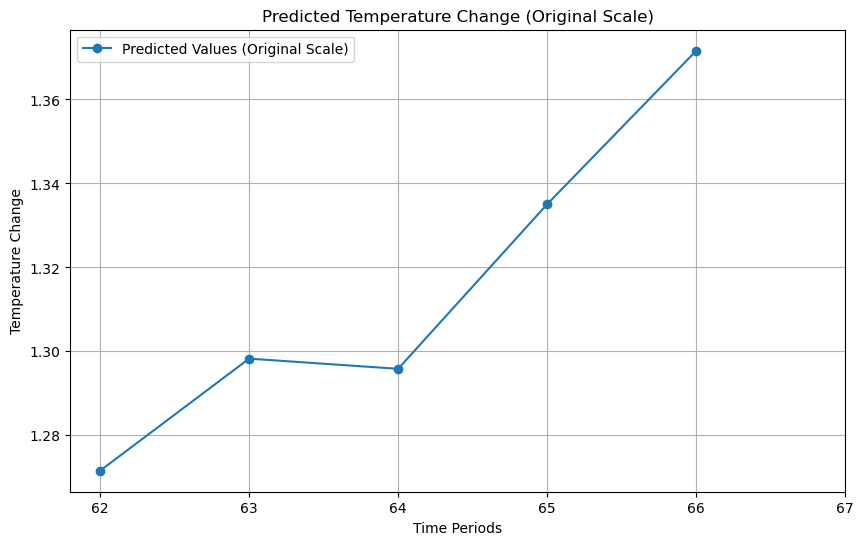

In [134]:
# De-log transform predictions
constant = abs(USA['TempChange'].min()) + 1
predictions_original = np.exp(predictions) - constant

import matplotlib.pyplot as plt

# De-log transformed predictions
plt.figure(figsize=(10, 6))
plt.plot(predictions_original, marker='o', label='Predicted Values (Original Scale)')
plt.title('Predicted Temperature Change (Original Scale)')
plt.xlabel('Time Periods')
plt.ylabel('Temperature Change')
plt.xticks(np.arange(start, start + end + 1, 1))  # Set x-ticks to whole numbers only
plt.legend()
plt.grid()
plt.show()




The predicted value of surface temp change are for the years after 2023 i.e., 2024 - 2028 on the x scale represented by 62...67